# Cleaning Data1
**Initial code cleaning of** 
- objects.csv
- funding_rounds.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import functions as f

## Outline
- [Cleanging object DataFrame](#cleaning-funding-rounds-dataframe)
- [Cleanging funding roudns DataFrame](#cleaning-funding-rounds-dataframe)
- [Merging](#merging)
- [Cleaning merged dataframe + separting dataframe for summary statistics](#cleaning-merged-dataframe--separting-dataframe-for-summary-statistics)
- [Figure/Summary Statistics Ideas](#figuresummary-statistics-ideas)
  - [Over time statistics](##over-time-statistics)
  - [Funding Type Sepcific Statistics](##funding-type-sepcific-statistics)

# Cleaning object DataFrame

In [3]:
# reading objects.csv
objects_path = 'C:/Users/Jaemin/OneDrive/Desktop/Y3/ECO225/ECO225Project/Data/objects.csv'
objects_df = pd.read_csv(objects_path) 
objects_df.dtypes

C:\Users\Jaemin\AppData\Local\Temp\ipykernel_37640\2930229218.py:3: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv(objects_path)


id                      object
entity_type             object
entity_id                int64
parent_id               object
name                    object
normalized_name         object
permalink               object
category_code           object
status                  object
founded_at              object
closed_at               object
domain                  object
homepage_url            object
twitter_username        object
logo_url                object
logo_width               int64
logo_height              int64
short_description       object
description             object
overview                object
tag_list                object
country_code            object
state_code              object
city                    object
region                  object
first_investment_at     object
last_investment_at      object
investment_rounds        int64
invested_companies       int64
first_funding_at        object
last_funding_at         object
funding_rounds           int64
funding_

1. Create sub dataframe that only contains columns of interest
2. Clean objects_df to only obtain startup in USA

In [4]:
# selecting subset of objects df
sub_objects_df = objects_df[['id', 'entity_type','country_code', 'state_code', 'region','investment_rounds']]

# filtering sub_object_df to only obtain US companies
sub_objects_df = f.filter_rows_by_condition(sub_objects_df, 'country_code', 'USA')

# replacing id with ints
sub_objects_df['id']

0             c:1
1            c:10
2           c:100
8         c:10005
12        c:10009
           ...   
208191     f:9985
208196     f:9991
208202     f:9997
208203     f:9998
208204     f:9999
Name: id, Length: 55584, dtype: object

In [5]:
# checking if there is any NaN value
sub_objects_df.isnull().any(axis=0)

id                   False
entity_type          False
country_code         False
state_code            True
region               False
investment_rounds    False
dtype: bool

# Cleaning funding rounds DataFrame

In [6]:
# reading investment.csv
funding_rounds_path = 'C:/Users/Jaemin/OneDrive/Desktop/Y3/ECO225/ECO225Project/Data/funding_rounds.csv'
funding_rounds_df = pd.read_csv(funding_rounds_path)
funding_rounds_df.dtypes
funding_rounds_df

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52923,57948,57948,c:211890,2013-12-12,series-a,a,3000000.0,3000000.0,USD,0.0,...,0.0,USD,1,1,1,http://techcrunch.com/2013/12/12/bitstrips-ser...,"Bitstrips Confirms $3M Series A From Horizons,...",amit2013,2013-12-12 14:12:05,2013-12-12 14:12:05
52924,57949,57949,c:267427,2010-02-06,venture,partial,570000.0,570000.0,USD,0.0,...,0.0,USD,0,0,1,http://www.sec.gov/Archives/edgar/data/1434188...,SEC,santosh2013,2013-12-12 14:13:11,2013-12-12 14:13:11
52925,57950,57950,c:261728,2010-02-06,venture,unattributed,2184100.0,2184100.0,USD,0.0,...,0.0,USD,0,0,1,http://www.sec.gov/Archives/edgar/data/1335158...,SEC,santosh2013,2013-12-12 14:19:35,2013-12-12 14:19:35
52926,57951,57951,c:285864,2013-12-12,series-a,a,790783.0,790783.0,USD,0.0,...,0.0,USD,0,1,1,http://www.startupticker.ch/en/news/december-2...,UrbanFarmers closes interim-investment round,amit2013,2013-12-12 14:23:49,2013-12-12 14:23:49


1. Create sub dataframe that only contains columns of interest

In [7]:
# selecting subset of funding rounds df
sub_funding_rounds_df = funding_rounds_df[['object_id', 'funded_at', 'funding_round_type', 'raised_amount_usd','pre_money_valuation_usd','is_first_round', 'post_money_valuation']]

# note: object_id in funding rounds is the same as id in object
sub_funding_rounds_df['object_id']

0             c:4
1             c:5
2             c:5
3             c:5
4          c:7299
           ...   
52923    c:211890
52924    c:267427
52925    c:261728
52926    c:285864
52927    c:286215
Name: object_id, Length: 52928, dtype: object

# Merging


In [8]:
# merge sub funding rounds and objects with id=object_id and how=outer
obj_funding_df = pd.merge(sub_objects_df, sub_funding_rounds_df.set_index('object_id'), left_on='id', right_on='object_id', how='inner').set_index('id')
obj_funding_df.dtypes

entity_type                 object
country_code                object
state_code                  object
region                      object
investment_rounds            int64
funded_at                   object
funding_round_type          object
raised_amount_usd          float64
pre_money_valuation_usd    float64
is_first_round               int64
post_money_valuation       float64
dtype: object

# Cleaning merged dataframe + separting dataframe for summary statistics


In [9]:
# cleaning after merger
# removing entity that is not Company (i.e., Person, FinancialOrg, Product)
obj_funding_df = f.filter_rows_by_condition(obj_funding_df, 'entity_type', 'Company')

# dropping all rows containing NaN in funded_at column 
obj_funding_df = obj_funding_df.dropna(subset='funded_at').reset_index().set_index(['id', 'funding_round_type'])

# checking if all NaN are dropped
obj_funding_df['funded_at'].notna().all()

True

In [10]:
# coverting date format
obj_funding_df['funded_at'] = obj_funding_df['funded_at'].apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d"))
obj_funding_df[['funded_at']].dtypes

funded_at    datetime64[ns]
dtype: object

In [11]:
# dropping all fund raised amount 0
obj_funding_df = f.filter_out_rows_by_condition(obj_funding_df, 'raised_amount_usd', 0.0).reset_index()

# conversion of funding unit to 1000 USD
conv_obj_funding_df = obj_funding_df.copy()
conv_obj_funding_df['raised_amount_usd'] = conv_obj_funding_df['raised_amount_usd']*(1/1000) 
conv_obj_funding_df = conv_obj_funding_df.rename(columns={'raised_amount_usd':'raised_amount_1000usd'})

In [12]:
# identifying funding type 
fundying_type = obj_funding_df.reset_index()['funding_round_type'].unique()
fundying_type

array(['series-a', 'series-b', 'series-c+', 'venture', 'other', 'angel',
       'private-equity', 'post-ipo', 'crowdfunding'], dtype=object)

In [13]:
# creating 6 separate dataframe for given fudning type

# series-a
series_a_df = f.filter_from_array(obj_funding_df,'funding_round_type', ['series-a', 'funded_at'])

# series-b
series_b_df = f.filter_rows_by_condition(obj_funding_df,'funding_round_type', 'series-b')

# series-c+
series_c_plus_df = f.filter_rows_by_condition(obj_funding_df,'funding_round_type', 'series-c+')

# venture
venture_df = f.filter_rows_by_condition(obj_funding_df,'funding_round_type', 'venture')

# angel
angel_df = f.filter_rows_by_condition(obj_funding_df,'funding_round_type', 'angel' )

# private equity
pe_df = f.filter_rows_by_condition(obj_funding_df,'funding_round_type', 'private-equity' )

In [14]:
# creating sub dataframe only including the 6 funding type specified above from 
# dataframe containign the $1000 USD as the unit of measure for raised amount 

# creating the list of funding type of interest
interesting_funding_type = ['series-a', 'series-b', 'series-c+', 'venture', 'angel', 'private-equity']

# keeping dataframe only containing the fundiyng type of interest 
filtered_funding_type_df = f.filter_from_array(conv_obj_funding_df, 'funding_round_type', interesting_funding_type)
filtered_funding_type_df

,id,funding_round_type,entity_type,country_code,state_code,region,investment_rounds,funded_at,raised_amount_1000usd,pre_money_valuation_usd,is_first_round,post_money_valuation
0,c:1,series-a,Company,USA,WA,Seattle,0,2005-10-01,5250.000,0.0,0,0.0
1,c:1001,series-a,Company,USA,CA,SF Bay,0,2008-02-26,5000.000,0.0,1,0.0
2,c:10015,series-a,Company,USA,CA,SF Bay,0,2008-10-10,2000.000,0.0,0,0.0
3,c:100271,series-a,Company,USA,WA,Seattle,0,2011-09-06,1500.000,0.0,1,0.0
4,c:1003,series-a,Company,USA,CA,SF Bay,0,2007-10-01,2500.000,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29582,c:8984,private-equity,Company,USA,CA,San Diego,0,2012-03-20,10980.000,0.0,1,0.0
29583,c:8984,private-equity,Company,USA,CA,San Diego,0,2012-02-02,17859.996,0.0,0,0.0
29584,c:9195,private-equity,Company,USA,CA,SF Bay,0,2012-06-28,5782.438,0.0,0,0.0
29585,c:972,private-equity,Company,USA,WA,Seattle,0,2013-05-23,3449.498,0.0,1,0.0


In [15]:
# added year dummy from 1960~2013 on the original data
six_types_and_year_dummy_df = f.add_year_dummy(filtered_funding_type_df, date_column='funded_at')
six_types_and_year_dummy_df

,id,funding_round_type,entity_type,country_code,state_code,region,investment_rounds,funded_at,raised_amount_1000usd,pre_money_valuation_usd,...,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013
0,c:1,series-a,Company,USA,WA,Seattle,0,2005-10-01,5250.000,0.0,...,False,True,False,False,False,False,False,False,False,False
1,c:1001,series-a,Company,USA,CA,SF Bay,0,2008-02-26,5000.000,0.0,...,False,False,False,False,True,False,False,False,False,False
2,c:10015,series-a,Company,USA,CA,SF Bay,0,2008-10-10,2000.000,0.0,...,False,False,False,False,True,False,False,False,False,False
3,c:100271,series-a,Company,USA,WA,Seattle,0,2011-09-06,1500.000,0.0,...,False,False,False,False,False,False,False,True,False,False
4,c:1003,series-a,Company,USA,CA,SF Bay,0,2007-10-01,2500.000,0.0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29582,c:8984,private-equity,Company,USA,CA,San Diego,0,2012-03-20,10980.000,0.0,...,False,False,False,False,False,False,False,False,True,False
29583,c:8984,private-equity,Company,USA,CA,San Diego,0,2012-02-02,17859.996,0.0,...,False,False,False,False,False,False,False,False,True,False
29584,c:9195,private-equity,Company,USA,CA,SF Bay,0,2012-06-28,5782.438,0.0,...,False,False,False,False,False,False,False,False,True,False
29585,c:972,private-equity,Company,USA,WA,Seattle,0,2013-05-23,3449.498,0.0,...,False,False,False,False,False,False,False,False,False,True


# Figure/Summary Statistics Ideas

## Over time statistics

1960~2013 (full sample)

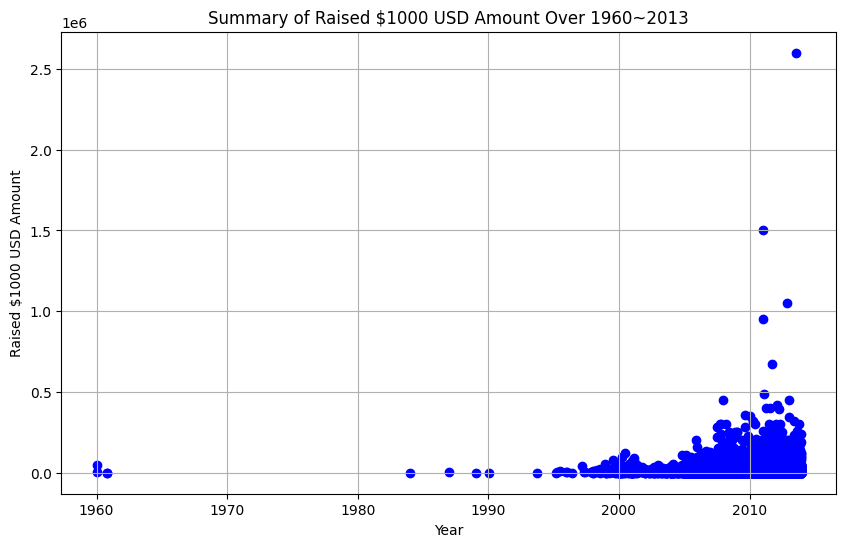

In [16]:
# create scatter plot of raised amount over time (1960~2013)

# plotting
plt.figure(figsize=(10, 6))
plt.scatter(filtered_funding_type_df['funded_at'], filtered_funding_type_df['raised_amount_1000usd'], marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Raised $1000 USD Amount')
plt.title('Summary of Raised $1000 USD Amount Over 1960~2013')
plt.grid(True)


1980~2000

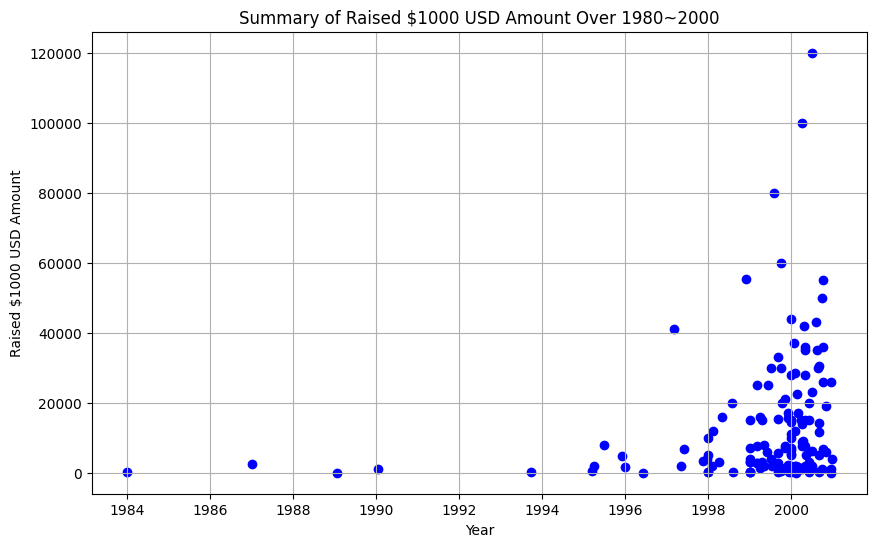

In [17]:
# create scatter plot of raised amount over time (1980~2000)

start_year = 1980
end_year = 2000
df_filtered = filtered_funding_type_df[(filtered_funding_type_df['funded_at'].dt.year >= start_year) & (filtered_funding_type_df['funded_at'].dt.year <= end_year)]

# plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['funded_at'], df_filtered['raised_amount_1000usd'], marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Raised $1000 USD Amount')
plt.title('Summary of Raised $1000 USD Amount Over 1980~2000')
plt.grid(True)

2000~2013 (most concentrated sample range)

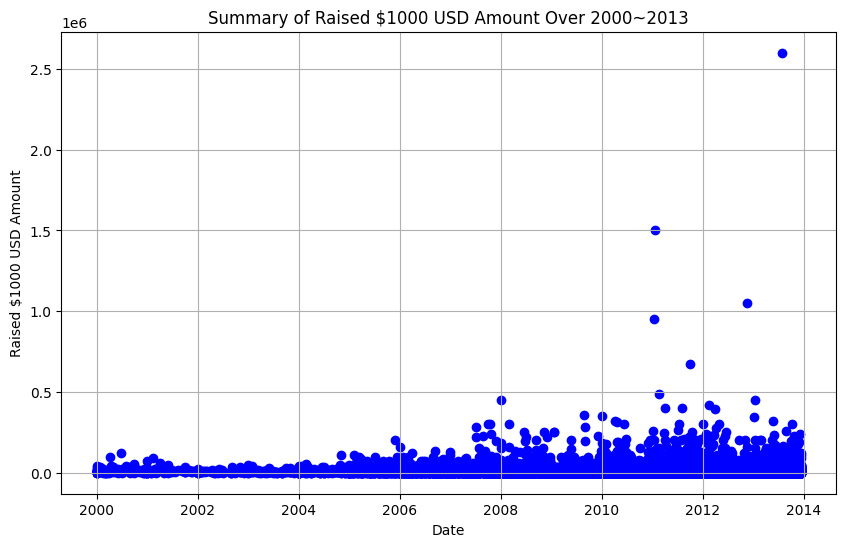

In [18]:
# create scatter plot of raised amount over time (2000~2013)
start_year = 2000
end_year = 2013
df_filtered = filtered_funding_type_df[(filtered_funding_type_df['funded_at'].dt.year >= start_year) & (filtered_funding_type_df['funded_at'].dt.year <= end_year)]

# plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['funded_at'], df_filtered['raised_amount_1000usd'], marker='o', color='blue')
plt.xlabel('Date')
plt.ylabel('Raised $1000 USD Amount')
plt.title('Summary of Raised $1000 USD Amount Over 2000~2013')
plt.grid(True)

Frequency Histogram Focusing on 2000~2013 

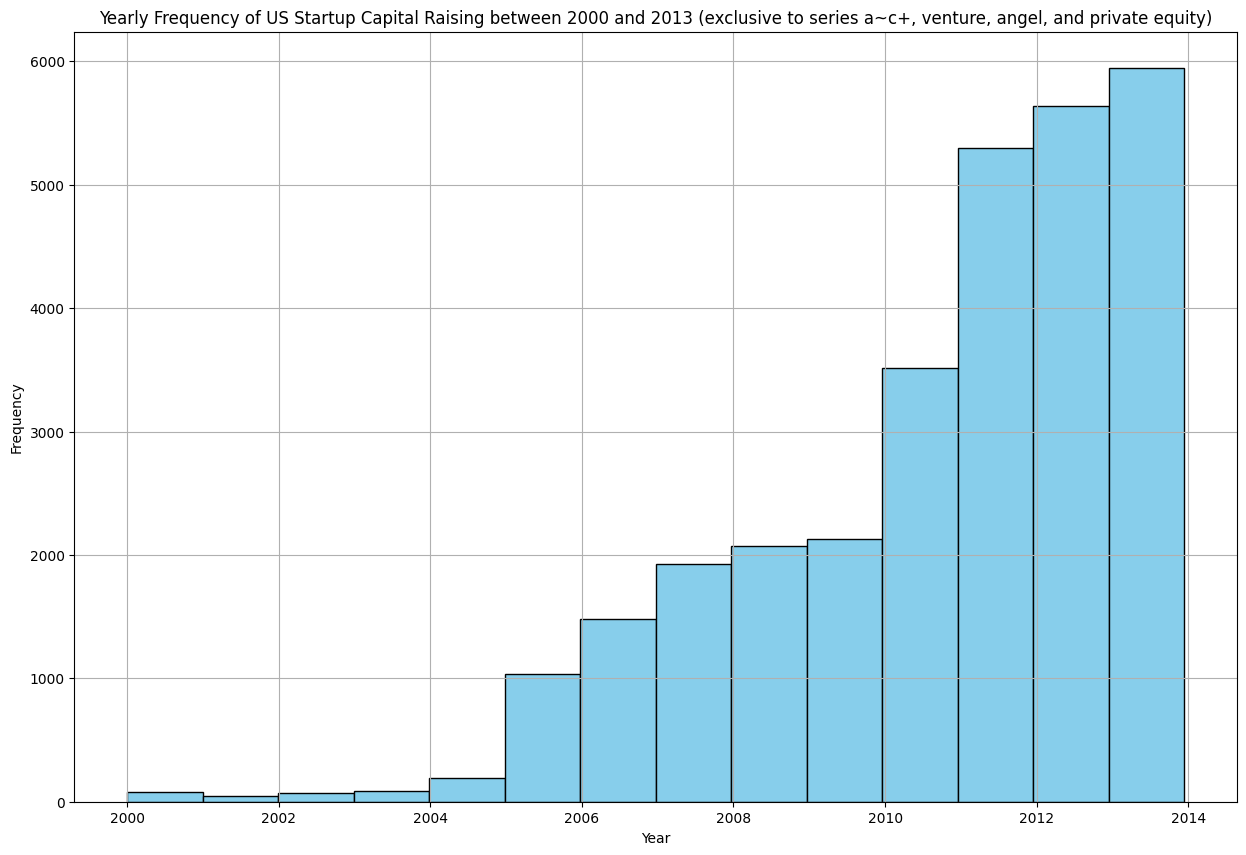

In [19]:
# create frequency histogram over time (2000~2013)
start_year = 2000
end_year = 2013
df_filtered = filtered_funding_type_df[(filtered_funding_type_df['funded_at'].dt.year >= start_year) & (filtered_funding_type_df['funded_at'].dt.year <= end_year)]

# plotting
plt.figure(figsize=(15, 10))
plt.hist(df_filtered['funded_at'], bins=14, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Yearly Frequency of US Startup Capital Raising between 2000 and 2013 (exclusive to series a~c+, venture, angel, and private equity)')
plt.grid(True)

## Funding Type Sepcific Statistics

Text(0.5, 1.0, 'Scatter Plot with Funding Type as Categories')

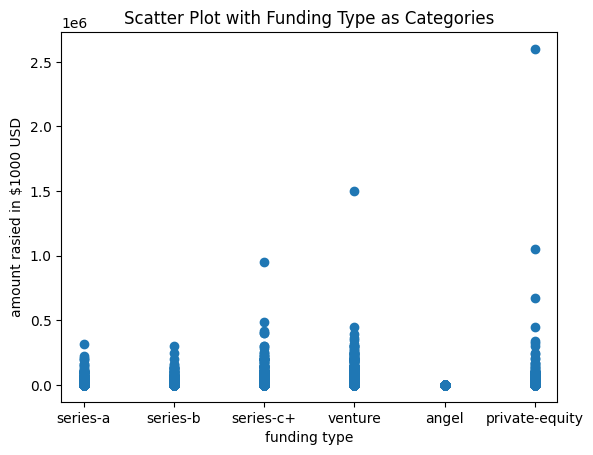

In [20]:
plt.scatter(filtered_funding_type_df['funding_round_type'],filtered_funding_type_df['raised_amount_1000usd'])

plt.xlabel('funding type')
plt.ylabel('amount rasied in $1000 USD')
plt.title('Scatter Plot with Funding Type as Categories')


Note: having issue with unitended conversion on hisogram --> indicate as 1000 USD for now and swich later

Series-a

In [21]:
series_a_df[['raised_amount_usd']]

,raised_amount_usd
0,5250000.0
1,5000000.0
2,2000000.0
3,1500000.0
4,2500000.0
...,...
6460,5387632.0
6461,5000000.0
6462,5000000.0
6463,10000000.0


Text(0.5, 1.0, 'US Startup Series-a Investment from 1960 to 2013')

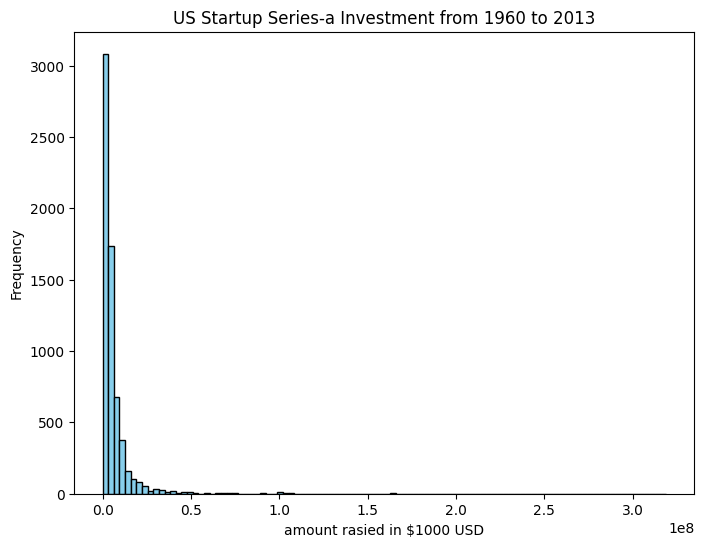

In [22]:
# Historgram for series-a
plt.figure(figsize=(8, 6))
plt.hist(series_a_df['raised_amount_usd'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('amount rasied in $1000 USD')
plt.ylabel('Frequency')
plt.title('US Startup Series-a Investment from 1960 to 2013')

In [23]:
series_a_df[['raised_amount_usd']].describe()

,raised_amount_usd
count,6.465000e+03
mean,6.296007e+06
std,1.182647e+07
min,2.910000e+02
25%,2.000000e+06
50%,3.500000e+06
75%,6.500000e+06
max,3.190000e+08


Series-b

Text(0.5, 1.0, 'US Startup Series-b Investment from 1960 to 2013')

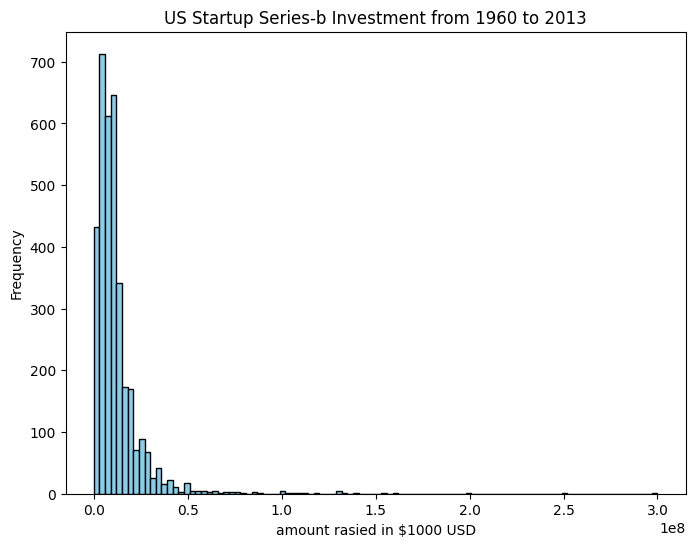

In [24]:
# Historgram for series-b
plt.figure(figsize=(8, 6))
plt.hist(series_b_df['raised_amount_usd'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('amount rasied in $1000 USD')
plt.ylabel('Frequency')
plt.title('US Startup Series-b Investment from 1960 to 2013')

In [25]:
series_b_df[['raised_amount_usd']].describe()

,raised_amount_usd
count,3.504000e+03
mean,1.222607e+07
std,1.450358e+07
min,2.000000e+03
25%,5.000000e+06
50%,9.000000e+06
75%,1.500000e+07
max,3.000000e+08


Sereies-c+

Text(0.5, 1.0, 'US Startup Series-c+ Investment from 1960 to 2013')

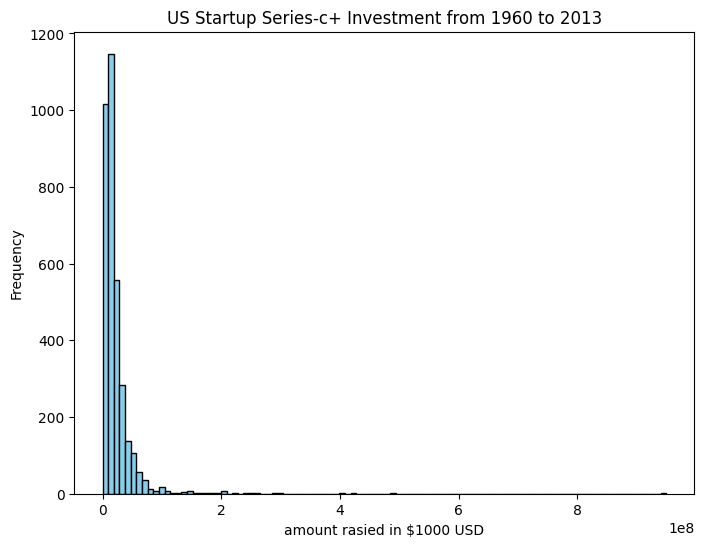

In [26]:
# Historgram for series-c+
plt.figure(figsize=(8, 6))
plt.hist(series_c_plus_df['raised_amount_usd'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('amount rasied in $1000 USD')
plt.ylabel('Frequency')
plt.title('US Startup Series-c+ Investment from 1960 to 2013')

In [27]:
series_b_df[['raised_amount_usd']].describe()

,raised_amount_usd
count,3.504000e+03
mean,1.222607e+07
std,1.450358e+07
min,2.000000e+03
25%,5.000000e+06
50%,9.000000e+06
75%,1.500000e+07
max,3.000000e+08


Venture Capital


Text(0.5, 1.0, 'US Startup Venture Capital Investment from 1960 to 2013')

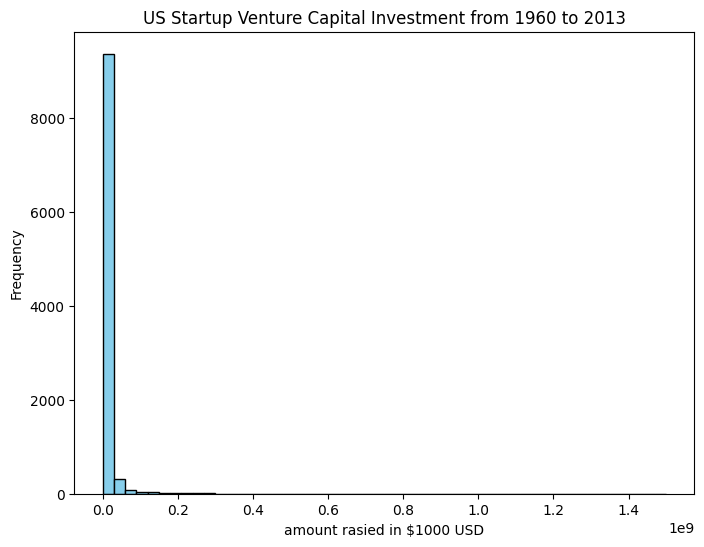

In [28]:
# Historgram for venture
plt.figure(figsize=(8, 6))
plt.hist(venture_df['raised_amount_usd'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('amount rasied in $1000 USD')
plt.ylabel('Frequency')
plt.title('US Startup Venture Capital Investment from 1960 to 2013')

In [29]:
venture_df[['raised_amount_usd']].describe()

,raised_amount_usd
count,9.875000e+03
mean,8.497934e+06
std,2.647018e+07
min,1.000000e+03
25%,7.088125e+05
50%,2.500000e+06
75%,7.500000e+06
max,1.500000e+09


Angle Investment

Text(0.5, 1.0, 'US Startup Angel Investment from 1960 to 2013')

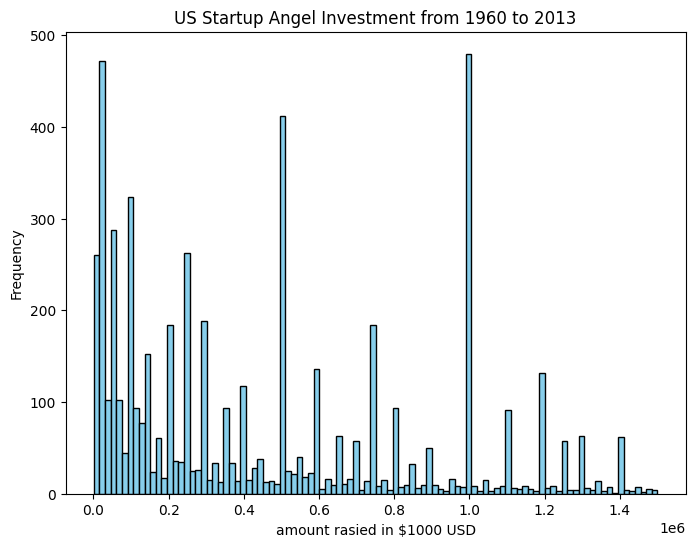

In [30]:
# Historgram for angel investment
plt.figure(figsize=(8, 6))
plt.hist(angel_df['raised_amount_usd'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('amount rasied in $1000 USD')
plt.ylabel('Frequency')
plt.title('US Startup Angel Investment from 1960 to 2013')

In [31]:
angel_df[['raised_amount_usd']].describe()

,raised_amount_usd
count,5.590000e+03
mean,4.532138e+05
std,4.025132e+05
min,1.000000e+03
25%,1.000000e+05
50%,3.200000e+05
75%,7.500000e+05
max,1.499999e+06


Private Equity

Text(0.5, 1.0, 'US Startup Private Equity Investment from 1960 to 2013')

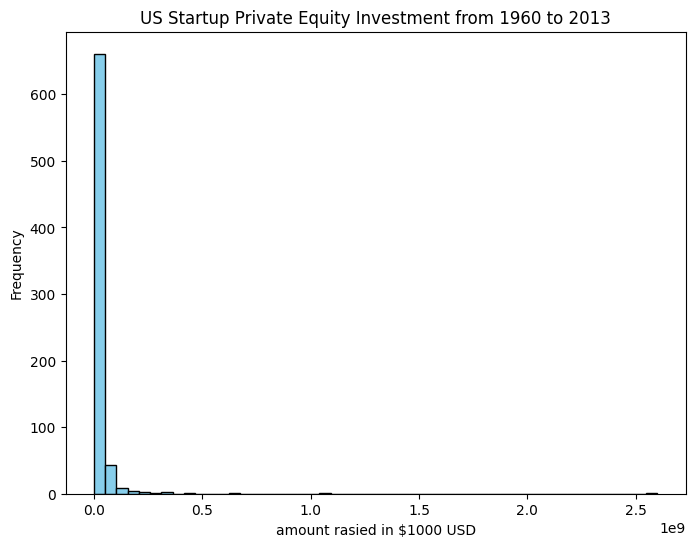

In [32]:
# Historgram for private equity
plt.figure(figsize=(8, 6))
plt.hist(pe_df['raised_amount_usd'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('amount rasied in $1000 USD')
plt.ylabel('Frequency')
plt.title('US Startup Private Equity Investment from 1960 to 2013')

In [33]:
series_b_df[['raised_amount_usd']].describe()

,raised_amount_usd
count,3.504000e+03
mean,1.222607e+07
std,1.450358e+07
min,2.000000e+03
25%,5.000000e+06
50%,9.000000e+06
75%,1.500000e+07
max,3.000000e+08
